# Preparing Time Series from Wide-Form Data-Core

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
## Customization Options
# plt.style.use(['fivethirtyeight'])#'seaborn-talk'])#,
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)


In [3]:
#Plot function
def format_xdates(ax, fig=None, xtick_fontweight='bold',
               title= None):
    """Formats x-axis with minor ticks every 3 months, and major 
    ticks every year. Includes different grid options for visibility"""
    # create the locator to place ticks every 3 months.
    loc_3months = mdates.MonthLocator(interval=3)
    fmt_months = mdates.DateFormatter("%b")
    ## for major year ticks
    loc_year = mdates.YearLocator()
    fmt_year = mdates.DateFormatter("%Y")
    
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), 
                       fontweight=xtick_fontweight) 
    
    ## customize minor ticks
    ax.xaxis.set_minor_locator(loc_3months)
    ax.xaxis.set_minor_formatter(fmt_months)
    ## customize major ticks
    ax.xaxis.set_major_locator(loc_year)
    ax.xaxis.set_major_formatter(fmt_year)
    ## Making major/minor gridlines visually distince
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='k')
    if fig is None:
        fig = ax.get_figure()
    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

In [4]:
#Load Data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
df = pd.read_csv(url)
df


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [5]:
list = [0,1,2,3]

In [6]:
#Create dataframe of largest cities
df_largest = df.loc[df["SizeRank"].isin(list)]

In [7]:
df_largest

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


# Melt data to long form

In [8]:
melted = pd.melt(df_largest,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType','StateName', 'State', 'Metro', 'CountyName'])
melted


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,variable,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [9]:
#Rename new variable column to Date
melted.rename(columns = {'variable':'Date'}, inplace = True)
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,value
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [10]:
#Convert Date column to datetime type
melted['Date'] = pd.to_datetime(melted['Date'])
melted.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   value       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [11]:
#Set the Date column as the index
melted = melted.set_index("Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,value
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0
...,...,...,...,...,...,...,...,...,...
2022-08-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,315587.0
2022-09-30,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,781622.0
2022-09-30,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,966595.0


In [12]:
#Resample the dataframe as monthly frequency, grouped by City.

In [13]:
melted['RegionName'].nunique()



4

In [14]:
df_ts = melted.groupby('RegionName').resample("MS").sum()
df_ts



C:\Users\Owner\AppData\Local\Temp\ipykernel_2656\387857707.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = melted.groupby('RegionName').resample("MS").sum()


RegionID  SizeRank     value
RegionName Date                                    
Chicago    2000-01-01     17426         3  166139.0
           2000-02-01     17426         3  166536.0
           2000-03-01     17426         3  167368.0
           2000-04-01     17426         3  168826.0
           2000-05-01     17426         3  170499.0
...                         ...       ...       ...
New York   2022-05-01      6181         0  768797.0
           2022-06-01      6181         0  773944.0
           2022-07-01      6181         0  777692.0
           2022-08-01      6181         0  779960.0
           2022-09-01      6181         0  781622.0

[1092 rows x 3 columns]

# Part 2

In [15]:
#Plot the home values for all 4 cities. (Hint: use unstack)
unstacked_value = df_ts["value"].unstack(level=0)
unstacked_value


RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-01,166139.0,109068.0,234181.0,253690.0
2000-02-01,166536.0,109079.0,234401.0,255517.0
2000-03-01,167368.0,108878.0,235513.0,257207.0
2000-04-01,168826.0,108881.0,237589.0,260310.0
2000-05-01,170499.0,108834.0,240113.0,263204.0
...,...,...,...,...
2022-05-01,312487.0,265558.0,990391.0,768797.0
2022-06-01,314663.0,268901.0,992337.0,773944.0
2022-07-01,315910.0,271059.0,992630.0,777692.0


In [16]:
#Reformat the y-axis ticks to use thousands of dollars with a "K" at the end. (e.g. "200K, 400K, etc"); Hint: use the FuncFormatter from matplotlib.
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_thous = mticks.FuncFormatter(thousands)


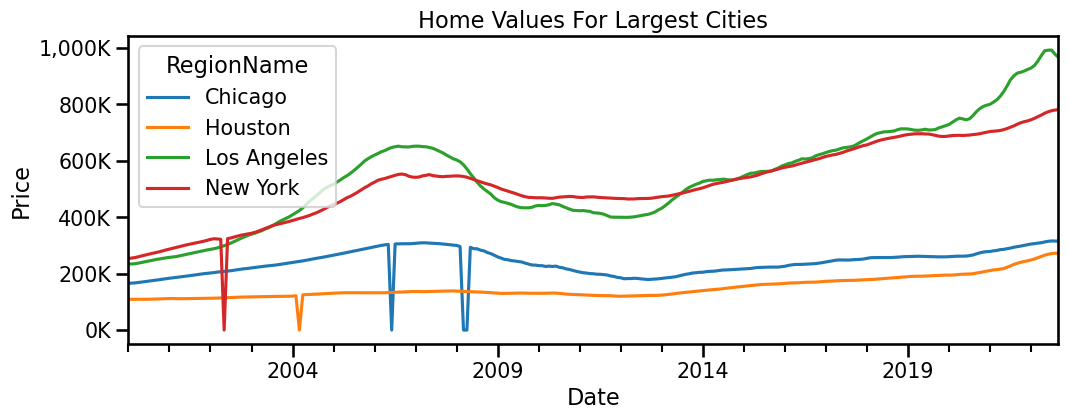

In [17]:
#Create plot of home values
ax = unstacked_value.plot()
ax.set_title("Home Values For Largest Cities")
ax.set_ylabel("Price")
ax.yaxis.set_major_formatter(fmt_thous);


1) Which City had the highest Typical Home Value at the end of 2008? New York
2) Which had the least? Houston
Hint: You can use the unstacked dataframe or use pd.IndexSlice with the multiindex.

In [18]:
df_ts.head().index

MultiIndex([('Chicago', '2000-01-01'),
            ('Chicago', '2000-02-01'),
            ('Chicago', '2000-03-01'),
            ('Chicago', '2000-04-01'),
            ('Chicago', '2000-05-01')],
           names=['RegionName', 'Date'])

In [19]:
ax2 = unstacked_value.loc["2008"]

<Axes: xlabel='Date'>

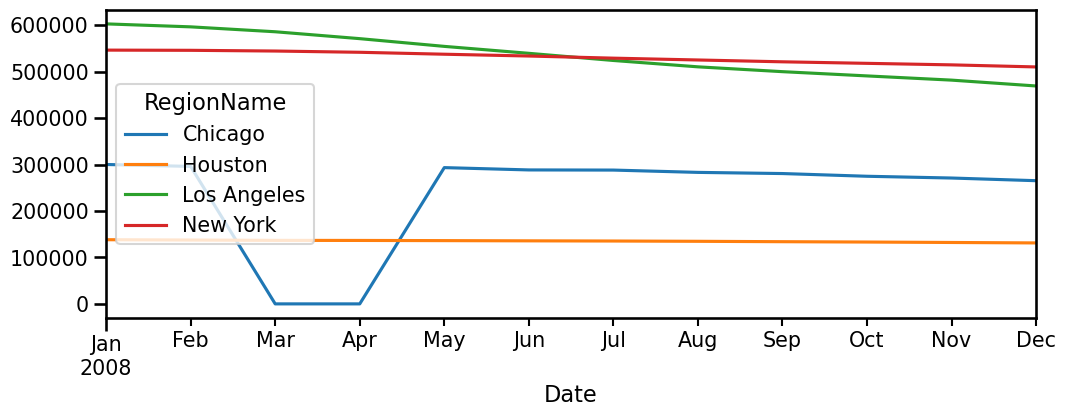

In [20]:
ax2.plot()
#ax2.set_title("Home Values For Largest Cities in 2008")
#ax2.set_ylabel("Price")
#ax2.yaxis.set_major_formatter(fmt_thous);

2) How much did the home values change from November 2008 to December 2008 (in dollars)? Home prices went down by -5753.0, -964.0, -12611.0, -4458.0 for Chicago, Houston, Los Angeles, and New York, respectively.
Hint: you can use .diff() to calculate the change in values

In [21]:
Nov_Dec_2008 = unstacked_value.loc["2008-11-01":"2008-12-01"]

In [22]:
Nov_Dec_2008.diff()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-11-01,NaN,NaN,NaN,NaN
2008-12-01,-5753.0,-964.0,-12611.0,-4458.0


# GridSearch SARIMA Core

### Imports

In [23]:
import pmdarima as pm

In [24]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)


### Helper Functions

In [25]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [26]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [28]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig


### Gridsearch SARIMA

In [29]:
unstacked_value_ts = unstacked_value

In [30]:
unstacked_value_fullsetNY = unstacked_value_ts["New York"]

In [31]:
unstacked_value_ts.head()

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2000-01-01,166139.0,109068.0,234181.0,253690.0
2000-02-01,166536.0,109079.0,234401.0,255517.0
2000-03-01,167368.0,108878.0,235513.0,257207.0
2000-04-01,168826.0,108881.0,237589.0,260310.0
2000-05-01,170499.0,108834.0,240113.0,263204.0


In [32]:
unstacked_value_ts.isna().sum().sum()

0

In [33]:
unstacked_value_ts = unstacked_value_ts["New York"]
unstacked_value_ts

Date
2000-01-01    253690.0
2000-02-01    255517.0
2000-03-01    257207.0
2000-04-01    260310.0
2000-05-01    263204.0
                ...   
2022-05-01    768797.0
2022-06-01    773944.0
2022-07-01    777692.0
2022-08-01    779960.0
2022-09-01    781622.0
Freq: MS, Name: New York, Length: 273, dtype: float64

In [34]:
unstacked_value_ts = unstacked_value_ts.loc["2018":]
unstacked_value_ts

Date
2018-01-01    656700.0
2018-02-01    661012.0
2018-03-01    665672.0
2018-04-01    669989.0
2018-05-01    673514.0
2018-06-01    676434.0
2018-07-01    678984.0
2018-08-01    681140.0
2018-09-01    683546.0
2018-10-01    685588.0
2018-11-01    688553.0
2018-12-01    691226.0
2019-01-01    693208.0
2019-02-01    694425.0
2019-03-01    695720.0
2019-04-01    695824.0
2019-05-01    696173.0
2019-06-01    695186.0
2019-07-01    695010.0
2019-08-01    692926.0
2019-09-01    690189.0
2019-10-01    687693.0
2019-11-01    686304.0
2019-12-01    686650.0
2020-01-01    688073.0
2020-02-01    689697.0
2020-03-01    690055.0
2020-04-01    690520.0
2020-05-01    689921.0
2020-06-01    690785.0
2020-07-01    691384.0
2020-08-01    693097.0
2020-09-01    694261.0
2020-10-01    696260.0
2020-11-01    698929.0
2020-12-01    701899.0
2021-01-01    703956.0
2021-02-01    705003.0
2021-03-01    706066.0
2021-04-01    707633.0
2021-05-01    710706.0
2021-06-01    714507.0
2021-07-01    719155.0
2021-0

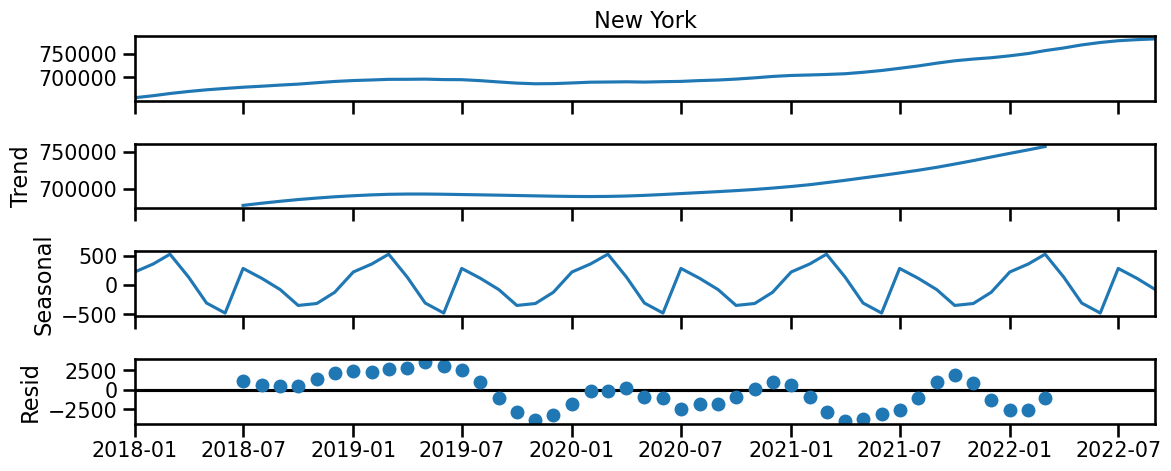

In [35]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(unstacked_value_ts)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

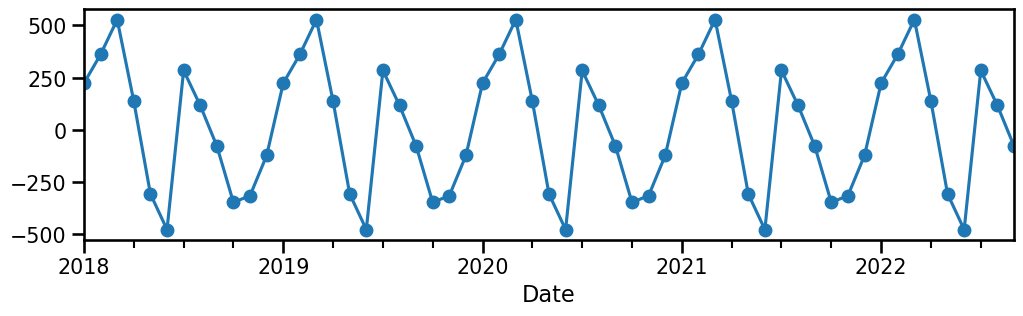

In [36]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.plot(marker = 'o')

In [37]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(unstacked_value_ts.max()-unstacked_value_ts.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 1006.1319444444575 which is ~0.81% of the variation in time series.


In [38]:
# This data does not appear to be seasonal!

In [39]:
# Check for stationarity
get_adfuller_results(unstacked_value_ts)


,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.407572,4,52,0.981776,0.05,False


In [40]:
# determine d
d = ndiffs(unstacked_value_ts)
print (f'd = {d}')
# determine D
D = nsdiffs(unstacked_value_ts, m = 12)
print (f'D = {D}')

d = 2
D = 0


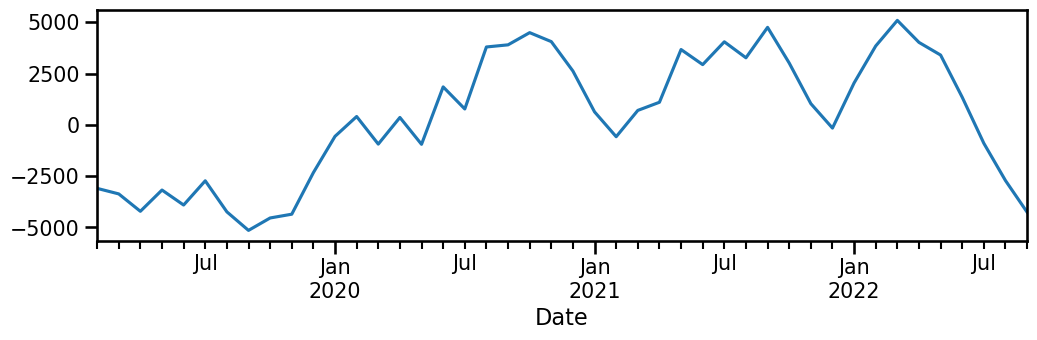

In [41]:
# apply both differencings
ts_diff = unstacked_value_ts.diff().diff(12).dropna()
ts_diff.plot();

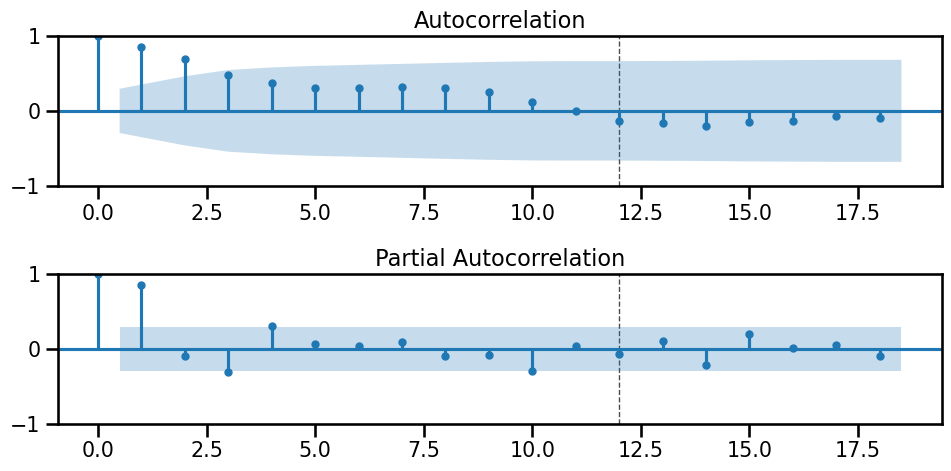

In [42]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_diff, annotate_seas = True, m = 12, nlags = 3*6);

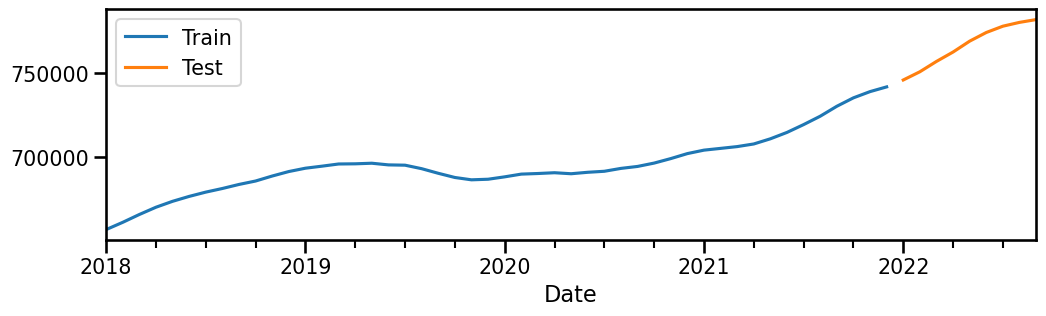

In [43]:
# tts
train, test = train_test_split(unstacked_value_ts, test_size=.15)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();


In [44]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           New York   No. Observations:                   48
Model:             ARIMA(1, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -376.501
Date:                            Fri, 03 Nov 2023   AIC                            761.002
Time:                                    01:24:30   BIC                            768.316
Sample:                                01-01-2018   HQIC                           763.742
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0014      0.107     -0.013      0.989      -0.212       0.209
ar.S.L12      -0.1704      3.701     -0.046      0.963      -7.424       7.083
ma.S.L12       0.1719      3.700      0.046      0.963      -7.080       7.424
sigma2      7.557e+05   6.24e-06   1.21e+11      0.000    7.56e+05    7.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.30   Prob(JB):                         0.51
Heteroskedasticity (H):               2.28   Skew:                             0.07
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+27. Standard errors may be unstable.
"""

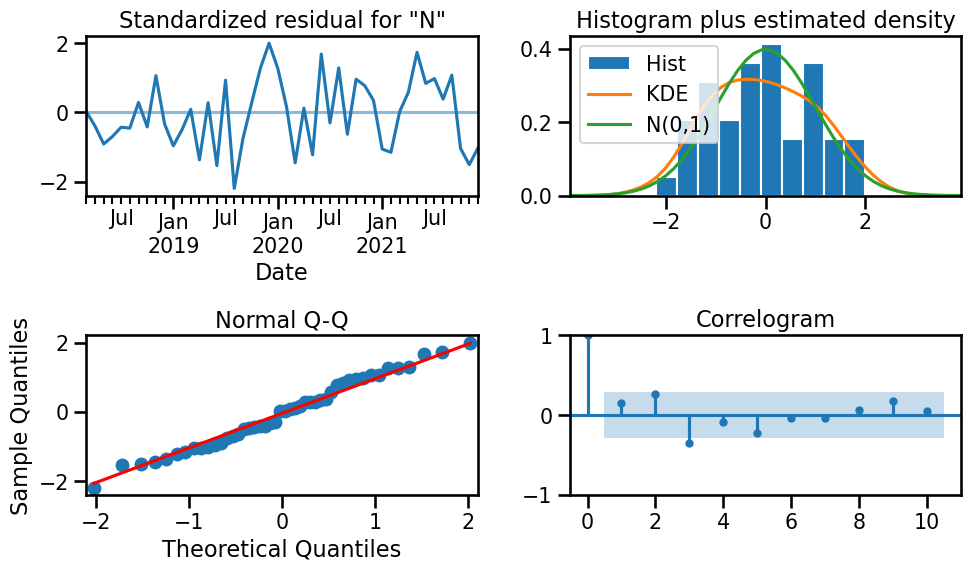

In [45]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,715.882
- MSE = 144,130,858.760
- RMSE = 12,005.451
- R^2 = 0.070
- MAPE = 1.39%


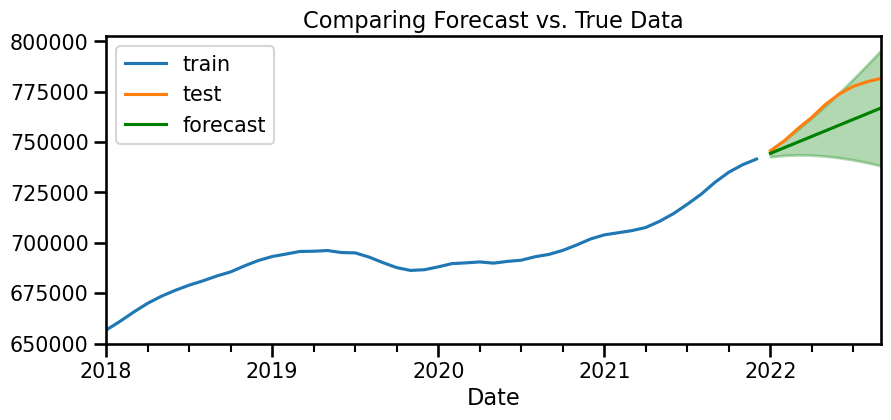

In [46]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

## Testing non-seasonal undiffed model

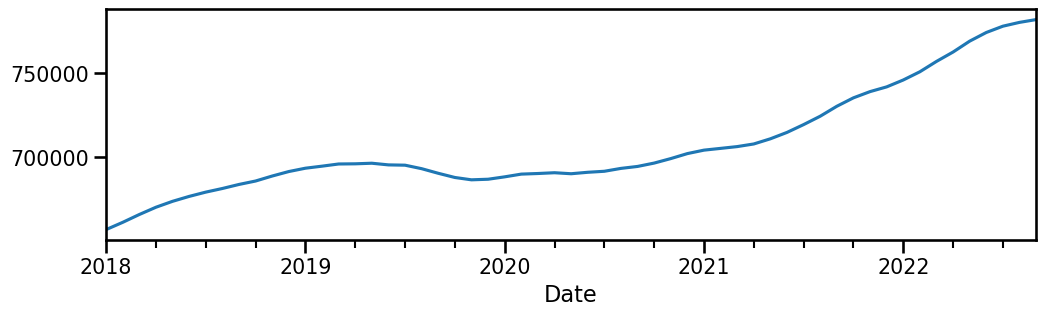

In [47]:
# apply both differencings
ts_undiff = unstacked_value_ts.dropna()
ts_undiff.plot();

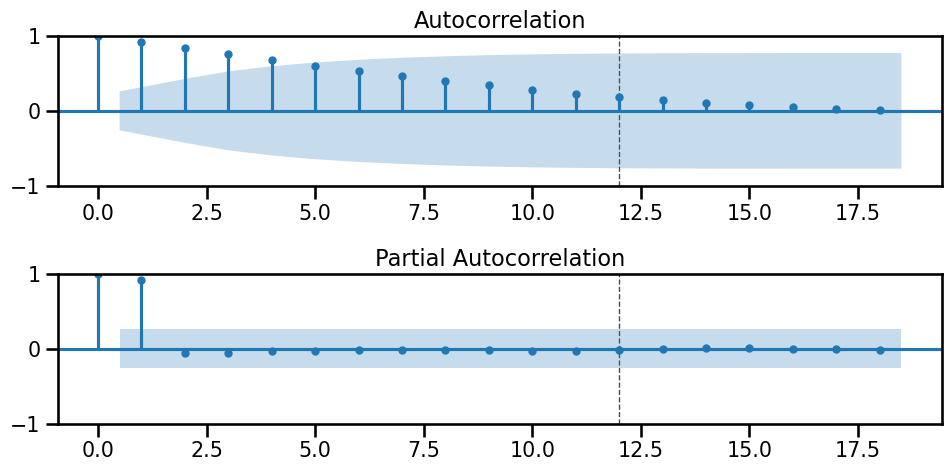

In [48]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(ts_undiff, annotate_seas = True, m = 12, nlags = 3*6);

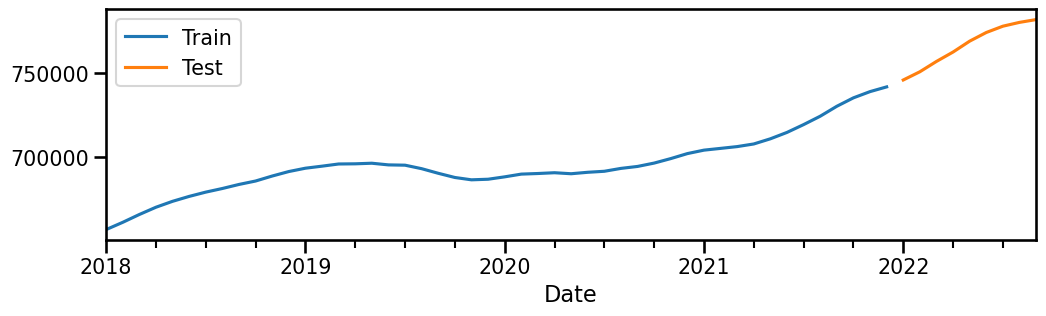

In [49]:
# tts
train, test = train_test_split(ts_undiff, test_size=.15)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [50]:
# Orders for non seasonal components
p = 0  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               New York   No. Observations:                   48
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -376.593
Date:                Fri, 03 Nov 2023   AIC                            757.186
Time:                        01:24:31   BIC                            760.843
Sample:                    01-01-2018   HQIC                           758.556
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0014      0.109     -0.013      0.989      -0.214       0.211
sigma2      7.648e+05   2.14e+05      3.573      0.000    3.45e+05    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.10   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.29   Prob(JB):                         0.50
Heteroskedasticity (H):               2.20   Skew:                             0.07
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

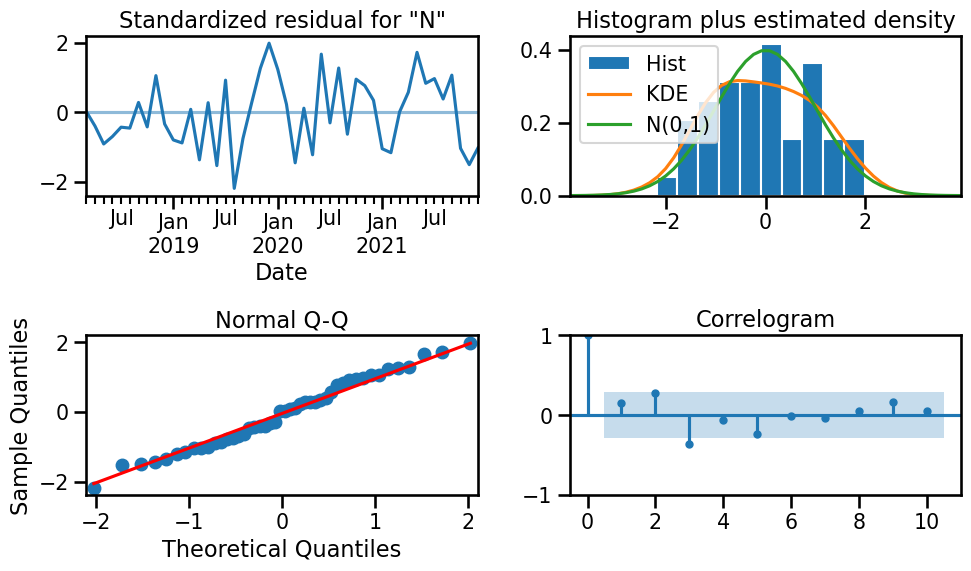

In [51]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 10,713.019
- MSE = 144,087,890.743
- RMSE = 12,003.662
- R^2 = 0.071
- MAPE = 1.39%


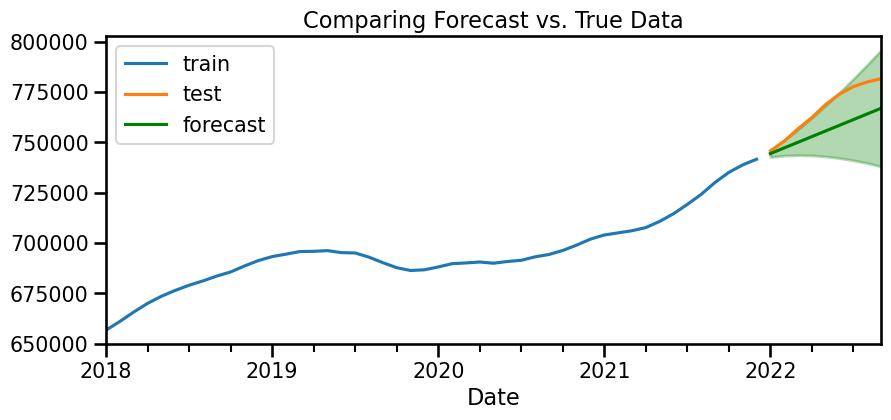

In [52]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

# Auto-ARIMA

In [53]:
#Bigger training set and smaller testing set
# Play with parameters...or don't
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=False,  
    m=12,
    trace=True
)


C:\Users\Owner\Anaconda3\envs\dojo-env\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=970.159, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=850.775, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1125.113, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=851.925, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=877.307, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=845.947, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=962.267, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=846.828, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=857.058, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=863.279, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=859.203, Time=0.11 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.852 seconds


In [54]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)


(1, 1, 1)
(0, 0, 0, 0)


In [55]:
# Obtain summary of the best model from auto_arima
auto_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -418.973
Date:                Fri, 03 Nov 2023   AIC                            845.947
Time:                        01:24:33   BIC                            853.347
Sample:                    01-01-2018   HQIC                           848.732
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    471.3718    787.197      0.599      0.549   -1071.506    2014.249
ar.L1          0.7034      0.482      1.459      0.145      -0.242       1.649
ma.L1         -0.6952      0.483     -1.438      0.150      -1.643       0.252
sigma2      3.083e+06      0.213   1.45e+07      0.000    3.08e+06    3.08e+06
===================================================================================
Ljung-Box (L1) (Q):                  37.91   Jarque-Bera (JB):                 0.28
Prob(Q):                              0.00   Prob(JB):                         0.87
Heteroskedasticity (H):               6.86   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.77e+23. Standard errors may be unstable.
"""

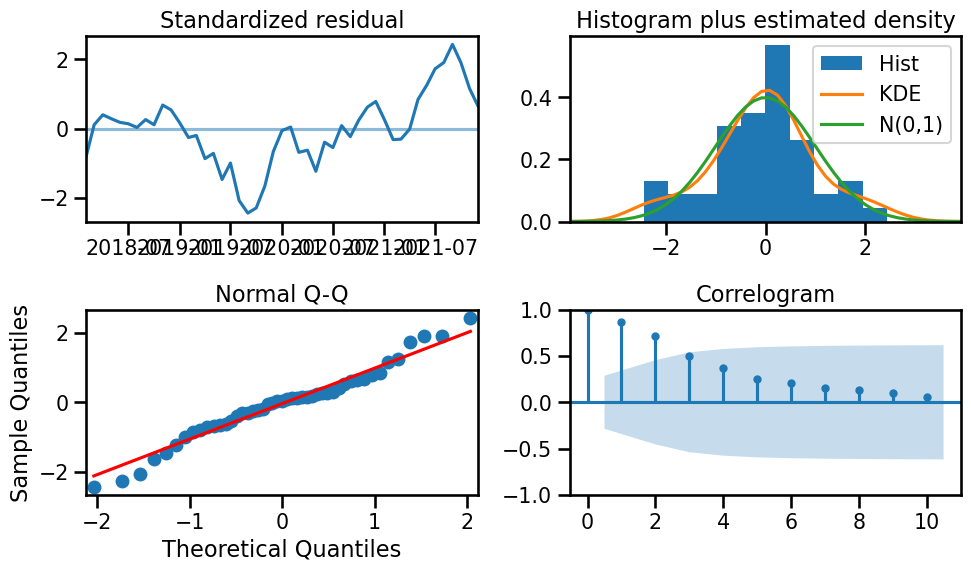

In [56]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 23,808.382
- MSE = 711,870,344.806
- RMSE = 26,680.899
- R^2 = -3.592
- MAPE = 3.08%


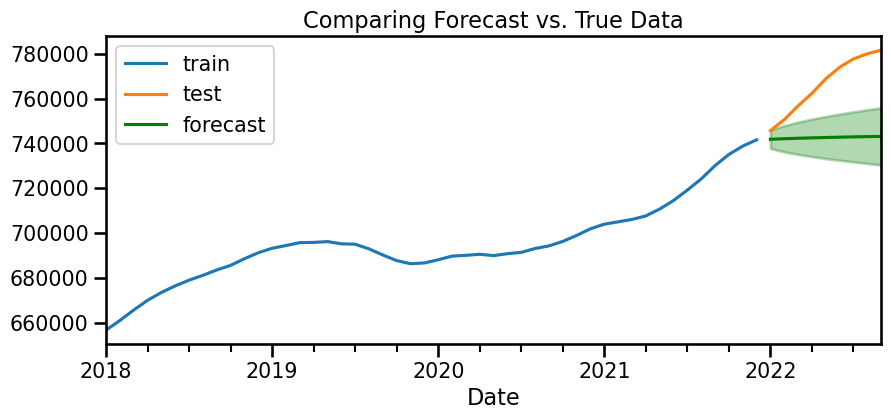

In [57]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])



# Extracting Future Forecasts

## I would select the undifferenced ARIMA model. It had a better MAPE score and better fiting forecast than the auto-ARIMA model which had a worse MAPE score and seemed to fail at making the forecast.

In [58]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 1  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(ts_undiff, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()


In [59]:
len(test)


9

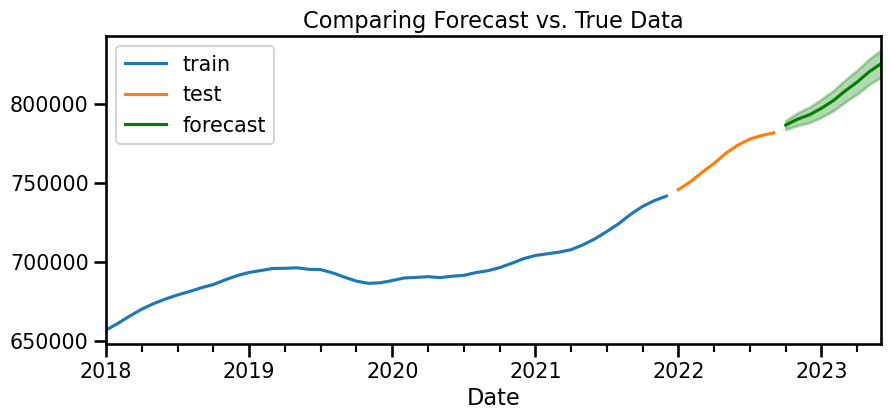

In [60]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);


In [61]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2022-10-01 00:00:00', freq='MS'),
 Timestamp('2023-06-01 00:00:00', freq='MS'))

In [62]:
starting_value = forecast_df['mean'].iloc[0]
starting_value


786588.0592615755

In [63]:
final_value = forecast_df['mean'].iloc[-1]
final_value

825462.5129620683

In [64]:
change = final_value - starting_value
change

38874.45370049286

In [65]:
perc_change = (change / starting_value) * 100
perc_change

4.942161687146254

# Answers

What is the predicted home value in New York City 6 months into the future (beyond the dataset)?825463 dollars


What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?
4.94 percent increase